# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples.
n_valid = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [2]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
#%20 percent of training set will splited to validation set

X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

32


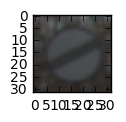

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
index=18
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [5]:
from sklearn.utils import shuffle

#X_train, y_train = shuffle(X_train, y_train)

### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def preprocess_for_nn(data):
    data=np.mean(data,axis=3) #grayscale conversion
    data-=int(np.mean(data))
    data/=int(np.std(data))
    num_channels=1
    return data.reshape(-1, image_shape[0], image_shape[1], num_channels).astype(np.float32)

def brightness_equilization(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max() # this line not necessary.
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

print(type(X_train),X_train.shape)

X_train = brightness_equilization(X_train)
X_train = preprocess_for_nn(X_train)

X_validation = brightness_equilization(X_validation)
X_validation = preprocess_for_nn(X_validation)

X_test = brightness_equilization(X_test)
X_test = preprocess_for_nn(X_test)

print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (31367, 32, 32, 3)
<class 'numpy.ndarray'> (31367, 32, 32, 1)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [6]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 256

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prop=0.5
    
    # SOLUTION: Layer 0: Convolutional. Input = 32x32x1. Output = 32x32x3.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, 3), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # SOLUTION: Activation.
    conv0 = tf.nn.relu(conv0)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Dropout
    conv1=tf.nn.dropout(conv1, keep_prop) 

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 36), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(36))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Dropout
    conv2=tf.nn.dropout(conv2, keep_prop)

    # SOLUTION: Flatten. Input = 5x5x36. Output = 900.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 900. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(900, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    #Dropout
    fc1=tf.nn.dropout(fc1, keep_prop)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2=tf.nn.dropout(fc2, keep_prop)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 1024. Output = 1024.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(1024))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    #Dropout
    fc3=tf.nn.dropout(fc3, keep_prop)

    # SOLUTION: Layer 6: Fully Connected. Input = 1024. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits, conv0_W, conv1_W, conv2_W, fc1_W, fc2_W, fc3_W, fc4_W, conv0_b, conv1_b, conv2_b, fc1_b, fc2_b, fc3_b, fc4_b 

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [9]:
base_rate = 0.001
global_step = tf.Variable(0, trainable=False)

# Decay once per epoch, using an exponential schedule starting at 0.01.
rate = tf.train.exponential_decay(
      base_rate,                 # Base learning rate.
      global_step * BATCH_SIZE,  # Current index into the dataset.
      X_train.shape[0],          # Decay step.
      0.96,                      # Decay rate.
      staircase=True)

beta = 0.001

logits, conv0_W, conv1_W, conv2_W, fc1_W, fc2_W, fc3_W, fc4_W, conv0_b, conv1_b, conv2_b, fc1_b, fc2_b, fc3_b, fc4_b  = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + beta * (tf.nn.l2_loss(conv0_W) + tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W) + tf.nn.l2_loss(conv0_b) + tf.nn.l2_loss(conv1_b) + tf.nn.l2_loss(conv2_b) + tf.nn.l2_loss(fc1_b) + tf.nn.l2_loss(fc2_b) + tf.nn.l2_loss(fc3_b) + tf.nn.l2_loss(fc4_b))    
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.055

EPOCH 2 ...
Validation Accuracy = 0.075

EPOCH 3 ...
Validation Accuracy = 0.120

EPOCH 4 ...
Validation Accuracy = 0.264

EPOCH 5 ...
Validation Accuracy = 0.382

EPOCH 6 ...
Validation Accuracy = 0.491

EPOCH 7 ...
Validation Accuracy = 0.567

EPOCH 8 ...
Validation Accuracy = 0.634

EPOCH 9 ...
Validation Accuracy = 0.671

EPOCH 10 ...
Validation Accuracy = 0.711

EPOCH 11 ...
Validation Accuracy = 0.742

EPOCH 12 ...
Validation Accuracy = 0.759

EPOCH 13 ...
Validation Accuracy = 0.781

EPOCH 14 ...
Validation Accuracy = 0.796

EPOCH 15 ...
Validation Accuracy = 0.815

EPOCH 16 ...
Validation Accuracy = 0.825

EPOCH 17 ...
Validation Accuracy = 0.832

EPOCH 18 ...
Validation Accuracy = 0.845

EPOCH 19 ...
Validation Accuracy = 0.850

EPOCH 20 ...
Validation Accuracy = 0.860

EPOCH 21 ...
Validation Accuracy = 0.868

EPOCH 22 ...
Validation Accuracy = 0.868

EPOCH 23 ...
Validation Accuracy = 0.872

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    X_test=preprocess_for_nn(X_test)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.878
